# Sprawozdanie z badania Manuskryptu Wojnicza
## Analiza porównawcza z manuskryptu z tekstami w języku greckim
### Autor: Jakub Kot


Do analizy zostały wykorzystane 2 dokumenty:
- Manuskrypt Wojnicza (29556 słów)
- Greckie artykuły na Wikipedii dotyczące Stanów Zjednoczonych oraz II wojny światowej (17898 słów)

## Importowanie bibliotek

In [51]:
from greek import greek_text
from manuscript import manuscript
from matplotlib import pyplot as plt
import numpy as np
import networkx as nx

## Przygotowanie tekstu do analizy

In [52]:
def remove_empty_strings(string):
    if len(string) == 0:
        return False
    return True

In [53]:
def prepare_greek_text(text):
    symbols = ['.', ',', '?', ';', '!', ':', '(', ')', '[', ']', '"', '-', '—', '–', '/', '@', '{', '}', '*', '«', '»', '+', '·', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    translate_table = dict((ord(char), None) for char in symbols)
    translated_text = text.translate(translate_table)
    tokenized_text = translated_text.split(' ')
    tokenized_text = list(filter(remove_empty_strings, tokenized_text))
    return tokenized_text

In [54]:
def create_n_gram(text, n, minval):
    n_grams = {}
    for i in range(len(text)-n+1):
        entry = tuple(text[i:n+i])
        if entry in n_grams.keys():
            n_grams[entry] += 1
        else:
            n_grams[entry] = 1 
    filtered_n_grams = {key: value for key, value in n_grams.items() if value >= minval}
    sorted_n_grams = sorted(filtered_n_grams.items(), key=lambda x:x[1], reverse=True)
    return sorted_n_grams

In [55]:
def filter_manuscript():
    f = open('manuscript.txt', 'r')
    filtered_lines = ""

    for line in f:
        if line[0] != "#" and line != '\x0c\n' and len(line)>1:
            filtered_lines += line[:-1]
    return filtered_lines

In [56]:
def manuscript_processing(text):
    tokenized_text = text.split(',')
    tokenized_text = list(filter(remove_empty_strings, tokenized_text))
    return tokenized_text

In [57]:
prepared_greek_text = prepare_greek_text(greek_text)
print(prepared_greek_text)
print(len(prepared_greek_text))

['\nΟι', 'Ηνωμένες', 'Πολιτείες', 'της', 'Αμερικής', 'αγγλικά', 'United', 'States', 'of', 'America', 'αποκαλούμενες', 'επίσης', 'Ηνωμένες', 'Πολιτείες', 'ενώ', 'πολλές', 'φορές', 'αναγράφονται', 'και', 'με', 'τη', 'συντομογραφία', 'ΗΠΑ', 'ή', 'αρκετές', 'φορές', 'απλά', 'Αμερική', 'είναι', 'η', 'τρίτη', 'μεγαλύτερη', 'σε', 'έκταση', 'και', 'σε', 'πληθυσμό', 'χώρα', 'της', 'Γης', 'Είναι', 'ομοσπονδιακή', 'συνταγματική', 'δημοκρατία', 'που', 'περιλαμβάνει', 'πενήντα', 'πολιτείες', 'και', 'μια', 'ομοσπονδιακή', 'περιφέρεια', 'Οι', 'ΗΠΑ', 'έχουν', 'έκταση', 'τχλμ', 'και', 'πληθυσμό', 'κατοίκους', 'σύμφωνα', 'με', 'επίσημες', 'εκτιμήσεις', 'για', 'τo', '\n\nΗ', 'ομοσπονδιακή', 'πρωτεύουσα', 'των', 'ΗΠΑ', 'είναι', 'η', 'Ουάσινγκτον', 'ΠΚ', 'ενώ', 'η', 'μεγαλύτερη', 'πληθυσμιακά', 'πόλη', 'και', 'το', 'σημαντικότερο', 'οικονομικό', 'της', 'κέντρο', 'είναι', 'η', 'Νέα', 'Υόρκη', 'Άλλες', 'σημαντικές', 'πόλεις', 'της', 'χώρας', 'είναι', 'το', 'Λος', 'Άντζελες', 'το', 'Σικάγο', 'το', 'Χιούστον',

In [58]:
filtered_manuscript = filter_manuscript()
print(filtered_manuscript)
print(len(filtered_manuscript))

FGAG2,GDAE,AR,GHAM,SOE,SORG,0D0RC2,GDOR,SOE8G-2ORG,DZAR,ORG,DAIR,THAM,SOR,AR,HZAR,HZAR,8ALA-2GAIIR,SCDG,OR,GDAM,SO8,HZOARG,HZC2,8ARAM,2G-0OM,OHCCG,OHCAR,ROEOHG,HZAAR,8AM,ODAM,OR,ODAL-2AIRG,TCAR,HZAM,PZAR,FZAM=G8ARAISG=O8AR,SG,SOE,PZOG,OG8AR,S,2,FZOAM,SO8ARG-GSCG,SO8G,ODTO,G,OHTOE,TOHZG,O2TG,8AN,TOR,DO2-8AM,SOR,FZOE,SO8G=8AN,02,HCO8G=G8AN,PZC2AM,OE2,PZCG,GHAN,SOSG,PZO8AEC2-ODSO,DSOG,OHAIRN,OHCOE,ODAL,SO8AN,2DZCG,8AM-SOG,DZCG,DO8AM,PZG,PZ08AIIE2,HZCG,SC,OE8AN,8-8AN,OM,TOE,O8AM,TO8AN,T8G,ODON,80R,HZG,DO8-8AM,SDZCG,DZOR,TOR,SCG,DOE,TOE,TOE,DOR,TOE-SO,TOE,SO8AL,DSG,DTG,8OR,TO8AM,SO,DOCAK-GTO,HTCG,TCDAN,SCO,PSOE,8G8G8,HZG,8AIHZG-GHO,SOE,SC,DO8SCG,PZCAEG,8ARAN,8AN,DZG82-8TAR,SHZAM,ODAIIR,TCG,2TG,PZHOE,HZOE2,8AOCHA-SOD,TOR,TCG,8AN,DZCG=OHOE,8AIM=PZO,SAM,SODTCCG,TOE,HSO8CC2G,SCG,PG8CCG,TG,RO8-00ON,TOE,8AN,HZAE,8AR,SCAR,DAM,8AR,SCG,HZCAR-CTO00,DAM,SOAM,ODOE,8AM,FAR,HZOE,8AM,HZOE8AR-GTCCG,ODCCG,ODG,8AM,ODTCG,DODAM,0TOE,DA8TG,8AE-8TCO,SO8G,DOTCG,HZG,ODTCG,DCCG,DCCG,8AE,THOR-0CO,TOE,TOD,TOHG,TOHCG=

In [59]:
processed_manuscript = manuscript_processing(filtered_manuscript)
print(processed_manuscript)
print(len(processed_manuscript))

['FGAG2', 'GDAE', 'AR', 'GHAM', 'SOE', 'SORG', '0D0RC2', 'GDOR', 'SOE8G-2ORG', 'DZAR', 'ORG', 'DAIR', 'THAM', 'SOR', 'AR', 'HZAR', 'HZAR', '8ALA-2GAIIR', 'SCDG', 'OR', 'GDAM', 'SO8', 'HZOARG', 'HZC2', '8ARAM', '2G-0OM', 'OHCCG', 'OHCAR', 'ROEOHG', 'HZAAR', '8AM', 'ODAM', 'OR', 'ODAL-2AIRG', 'TCAR', 'HZAM', 'PZAR', 'FZAM=G8ARAISG=O8AR', 'SG', 'SOE', 'PZOG', 'OG8AR', 'S', '2', 'FZOAM', 'SO8ARG-GSCG', 'SO8G', 'ODTO', 'G', 'OHTOE', 'TOHZG', 'O2TG', '8AN', 'TOR', 'DO2-8AM', 'SOR', 'FZOE', 'SO8G=8AN', '02', 'HCO8G=G8AN', 'PZC2AM', 'OE2', 'PZCG', 'GHAN', 'SOSG', 'PZO8AEC2-ODSO', 'DSOG', 'OHAIRN', 'OHCOE', 'ODAL', 'SO8AN', '2DZCG', '8AM-SOG', 'DZCG', 'DO8AM', 'PZG', 'PZ08AIIE2', 'HZCG', 'SC', 'OE8AN', '8-8AN', 'OM', 'TOE', 'O8AM', 'TO8AN', 'T8G', 'ODON', '80R', 'HZG', 'DO8-8AM', 'SDZCG', 'DZOR', 'TOR', 'SCG', 'DOE', 'TOE', 'TOE', 'DOR', 'TOE-SO', 'TOE', 'SO8AL', 'DSG', 'DTG', '8OR', 'TO8AM', 'SO', 'DOCAK-GTO', 'HTCG', 'TCDAN', 'SCO', 'PSOE', '8G8G8', 'HZG', '8AIHZG-GHO', 'SOE', 'SC', 'DO8SCG',

## Przygotowanie n-gramów

In [60]:
greek_ngram = create_n_gram(prepared_greek_text, 1, 1)
print(greek_ngram)
print(len(greek_ngram))

[(('και',), 671), (('της',), 483), (('του',), 443), (('από',), 323), (('των',), 319), (('την',), 307), (('το',), 293), (('η',), 265), (('να',), 237), (('τη',), 222), (('με',), 215), (('τους',), 200), (('οι',), 197), (('που',), 195), (('τον',), 182), (('σε',), 155), (('για',), 133), (('τις',), 133), (('στη',), 130), (('στην',), 126), (('τα',), 125), (('ο',), 123), (('στο',), 110), (('στις',), 88), (('ήταν',), 81), (('Η',), 77), (('ΗΠΑ',), 64), (('κατά',), 64), (('ως',), 63), (('μια',), 62), (('στον',), 61), (('είναι',), 59), (('Οι',), 58), (('στα',), 55), (('δυνάμεις',), 54), (('ότι',), 54), (('ενώ',), 47), (('Χίτλερ',), 47), (('δεν',), 46), (('είχε',), 46), (('ένα',), 45), (('αλλά',), 41), (('οποία',), 39), (('πολέμου',), 39), (('Ο',), 38), (('Το',), 38), (('ή',), 35), (('στρατιώτες',), 33), (('Ηνωμένες',), 32), (('%',), 32), (('διάρκεια',), 32), (('είχαν',), 32), (('μετά',), 31), (('χώρας',), 30), (('Γερμανία',), 30), (('Πολιτείες',), 29), (('πόλεμο',), 29), (('Ιαπωνία',), 29), (('Άξο

In [61]:
manuscript_ngram = create_n_gram(processed_manuscript, 1, 1)
print(manuscript_ngram)    

[(('8AM',), 618), (('TC8G',), 445), (('SC8G',), 398), (('4ODAM',), 367), (('OE',), 362), (('TOE',), 359), (('AM',), 336), (('TCG',), 316), (('4ODCC8G',), 267), (('SCG',), 250), (('ODAM',), 241), (('4ODCCG',), 241), (('4ODC8G',), 239), (('OR',), 233), (('AR',), 219), (('8AR',), 207), (('8AE',), 196), (('TOR',), 192), (('OHAM',), 171), (('4ODAE',), 164), (('SOE',), 161), (('TCCG',), 155), (('TCOE',), 144), (('AE',), 142), (('4OE',), 142), (('ODCCG',), 134), (('4ODAR',), 132), (('TDZG',), 128), (('SCCG',), 126), (('OHC8G',), 124), (('2AM',), 119), (('T8G',), 118), (('8G',), 118), (('TG',), 117), (('DAM',), 116), (('OHAR',), 114), (('OHAE',), 112), (('4ODG',), 110), (('ODAE',), 108), (('4OHAM',), 103), (('RAM',), 100), (('ODAR',), 98), (('ODC8G',), 98), (('SCOE',), 95), (('2',), 93), (('ETC8G',), 93), (('4ODCG',), 92), (('SG',), 91), (('ODCC8G',), 89), (('OHCCG',), 88), (('4OHC8G',), 88), (('8OE',), 86), (('HZG',), 83), (('SO',), 83), (('TCOR',), 80), (('SCC8G',), 77), (('OHCC8G',), 77), (

## Analiza Prawa Zipfa

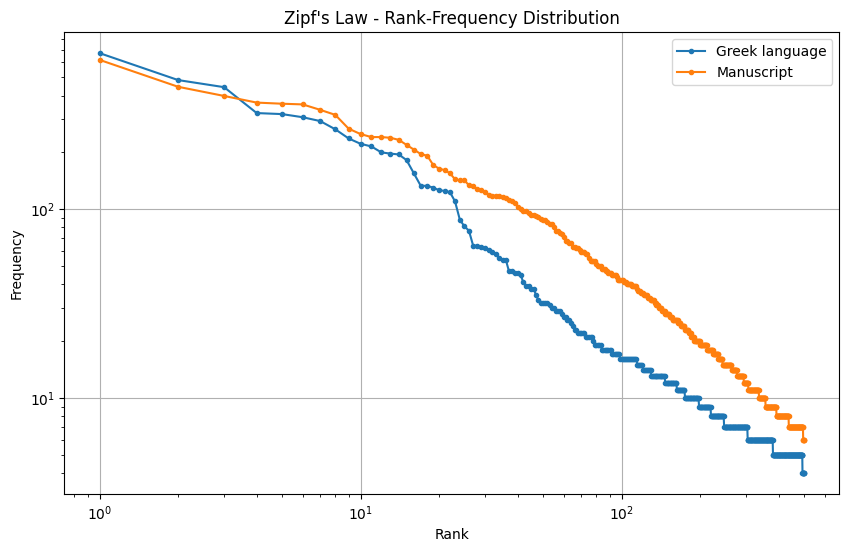

In [62]:
def plot_zipf(word_occurrences, label):
    ranks = list(range(1, len(word_occurrences) + 1))
    frequencies = [item[1] for item in word_occurrences]
    plt.loglog(ranks, frequencies, marker='.', label=label)

plt.figure(figsize=(10, 6))
plot_zipf(greek_ngram[:500], label='Greek language')
plot_zipf(manuscript_ngram[:500], label='Manuscript')

plt.title("Zipf's Law - Rank-Frequency Distribution")
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


## Analiza ilości n-gramów

In [63]:
greek_n_grams = []
manuscript_n_grams = []

for i in range(1, 11):
    greek_n_grams.append(len(create_n_gram(prepared_greek_text, i, 2)))
    manuscript_n_grams.append(len(create_n_gram(processed_manuscript, i, 2)))

print(greek_n_grams)
print(manuscript_n_grams)

[1715, 1651, 505, 117, 21, 2, 0, 0, 0, 0]
[1746, 1636, 146, 45, 32, 26, 20, 14, 10, 8]


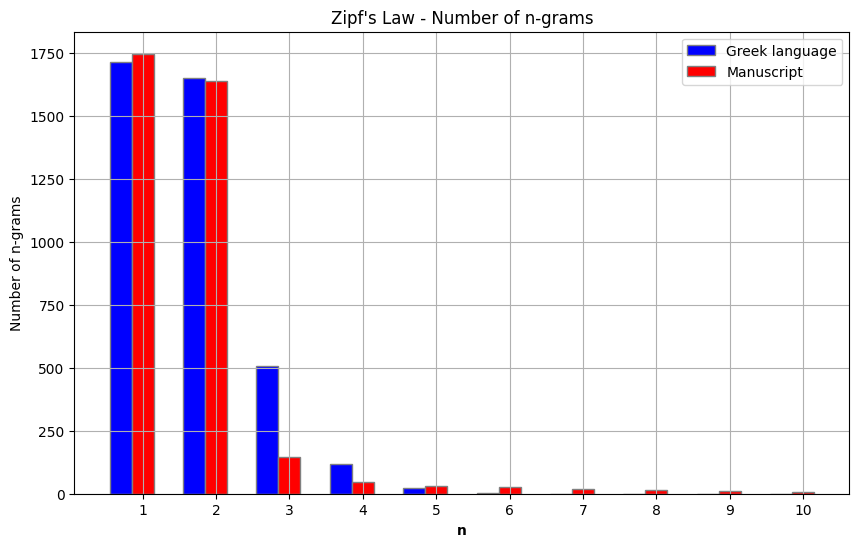

In [64]:
barWidth = 0.3
r1 = np.arange(len(greek_n_grams))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(10, 6))

plt.bar(r1, greek_n_grams, width = barWidth, color = 'b', edgecolor = 'grey', label='Greek language')
plt.bar(r2, manuscript_n_grams, width = barWidth, color = 'r', edgecolor = 'grey', label='Manuscript')

plt.xlabel('n', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(greek_n_grams))], range(1, 11))

plt.title("Zipf's Law - Number of n-grams")
plt.ylabel('Number of n-grams')
plt.legend()
plt.grid(True)
plt.show()

## Grafy połączeń słów

In [65]:
greek_pairs = create_n_gram(prepared_greek_text, 2, 4)

manuscript_pairs = create_n_gram(processed_manuscript, 2, 4)

print(greek_pairs)
print(manuscript_pairs)

[(('από', 'την'), 46), (('και', 'το'), 41), (('από', 'τις'), 40), (('από', 'τη'), 40), (('από', 'τους'), 39), (('των', 'ΗΠΑ'), 35), (('και', 'η'), 34), (('και', 'την'), 32), (('τη', 'διάρκεια'), 32), (('από', 'το'), 30), (('Ηνωμένες', 'Πολιτείες'), 29), (('κατά', 'τη'), 27), (('της', 'χώρας'), 26), (('με', 'την'), 26), (('του', 'πολέμου'), 23), (('με', 'τον'), 21), (('και', 'τη'), 21), (('από', 'τον'), 21), (('και', 'οι'), 21), (('του', 'Άξονα'), 21), (('η', 'οποία'), 19), (('για', 'να'), 19), (('με', 'το'), 18), (('για', 'την'), 17), (('το', '%'), 17), (('Σοβιετική', 'Ένωση'), 17), (('διάρκεια', 'της'), 17), (('της', 'Ιαπωνίας'), 17), (('των', 'Ηνωμένων'), 16), (('από', 'τα'), 16), (('οι', 'Γερμανοί'), 16), (('με', 'τη'), 15), (('και', 'του'), 15), (('Ηνωμένων', 'Πολιτειών'), 15), (('μετά', 'την'), 15), (('με', 'τις'), 15), (('και', 'να'), 14), (('δυνάμεις', 'του'), 14), (('του', 'Χίτλερ'), 14), (('τον', 'πόλεμο'), 14), (('σε', 'μια'), 14), (('είναι', 'η'), 13), (('και', 'ο'), 13), ((

In [66]:
def create_graph(pairs):
    G = nx.Graph()
    # Adjusting for pairs being a list of tuples where each tuple is ((word1, word2), frequency)
    edges = [(pair[0][0], pair[0][1], {'weight': pair[1]}) for pair in pairs]
    G.add_edges_from(edges)
    return G

greek_graph = create_graph(greek_pairs)
manuscript_graph = create_graph(manuscript_pairs)

print(greek_graph.edges(data=True))
print(manuscript_graph.edges(data=True))



[('από', 'την', {'weight': 46}), ('από', 'τις', {'weight': 40}), ('από', 'τη', {'weight': 40}), ('από', 'τους', {'weight': 4}), ('από', 'το', {'weight': 30}), ('από', 'τον', {'weight': 21}), ('από', 'τα', {'weight': 16}), ('από', 'πάνω', {'weight': 11}), ('από', 'και', {'weight': 6}), ('από', 'ένα', {'weight': 5}), ('από', 'πριν', {'weight': 5}), ('από', 'μετά', {'weight': 5}), ('από', 'περισσότερα', {'weight': 4}), ('από', 'περισσότεροι', {'weight': 4}), ('την', 'και', {'weight': 32}), ('την', 'με', {'weight': 26}), ('την', 'για', {'weight': 17}), ('την', 'μετά', {'weight': 15}), ('την', 'κατάληψη', {'weight': 9}), ('την', 'οποία', {'weight': 7}), ('την', 'πρώτη', {'weight': 7}), ('την', 'Κίνα', {'weight': 6}), ('την', 'Μετά', {'weight': 6}), ('την', 'υπό', {'weight': 5}), ('την', 'Ιαπωνία', {'weight': 5}), ('την', 'η', {'weight': 5}), ('την', 'ήττα', {'weight': 5}), ('την', 'έναρξη', {'weight': 5}), ('την', 'ηγεσία', {'weight': 4}), ('την', 'Ιταλία', {'weight': 4}), ('την', 'κατέλαβε

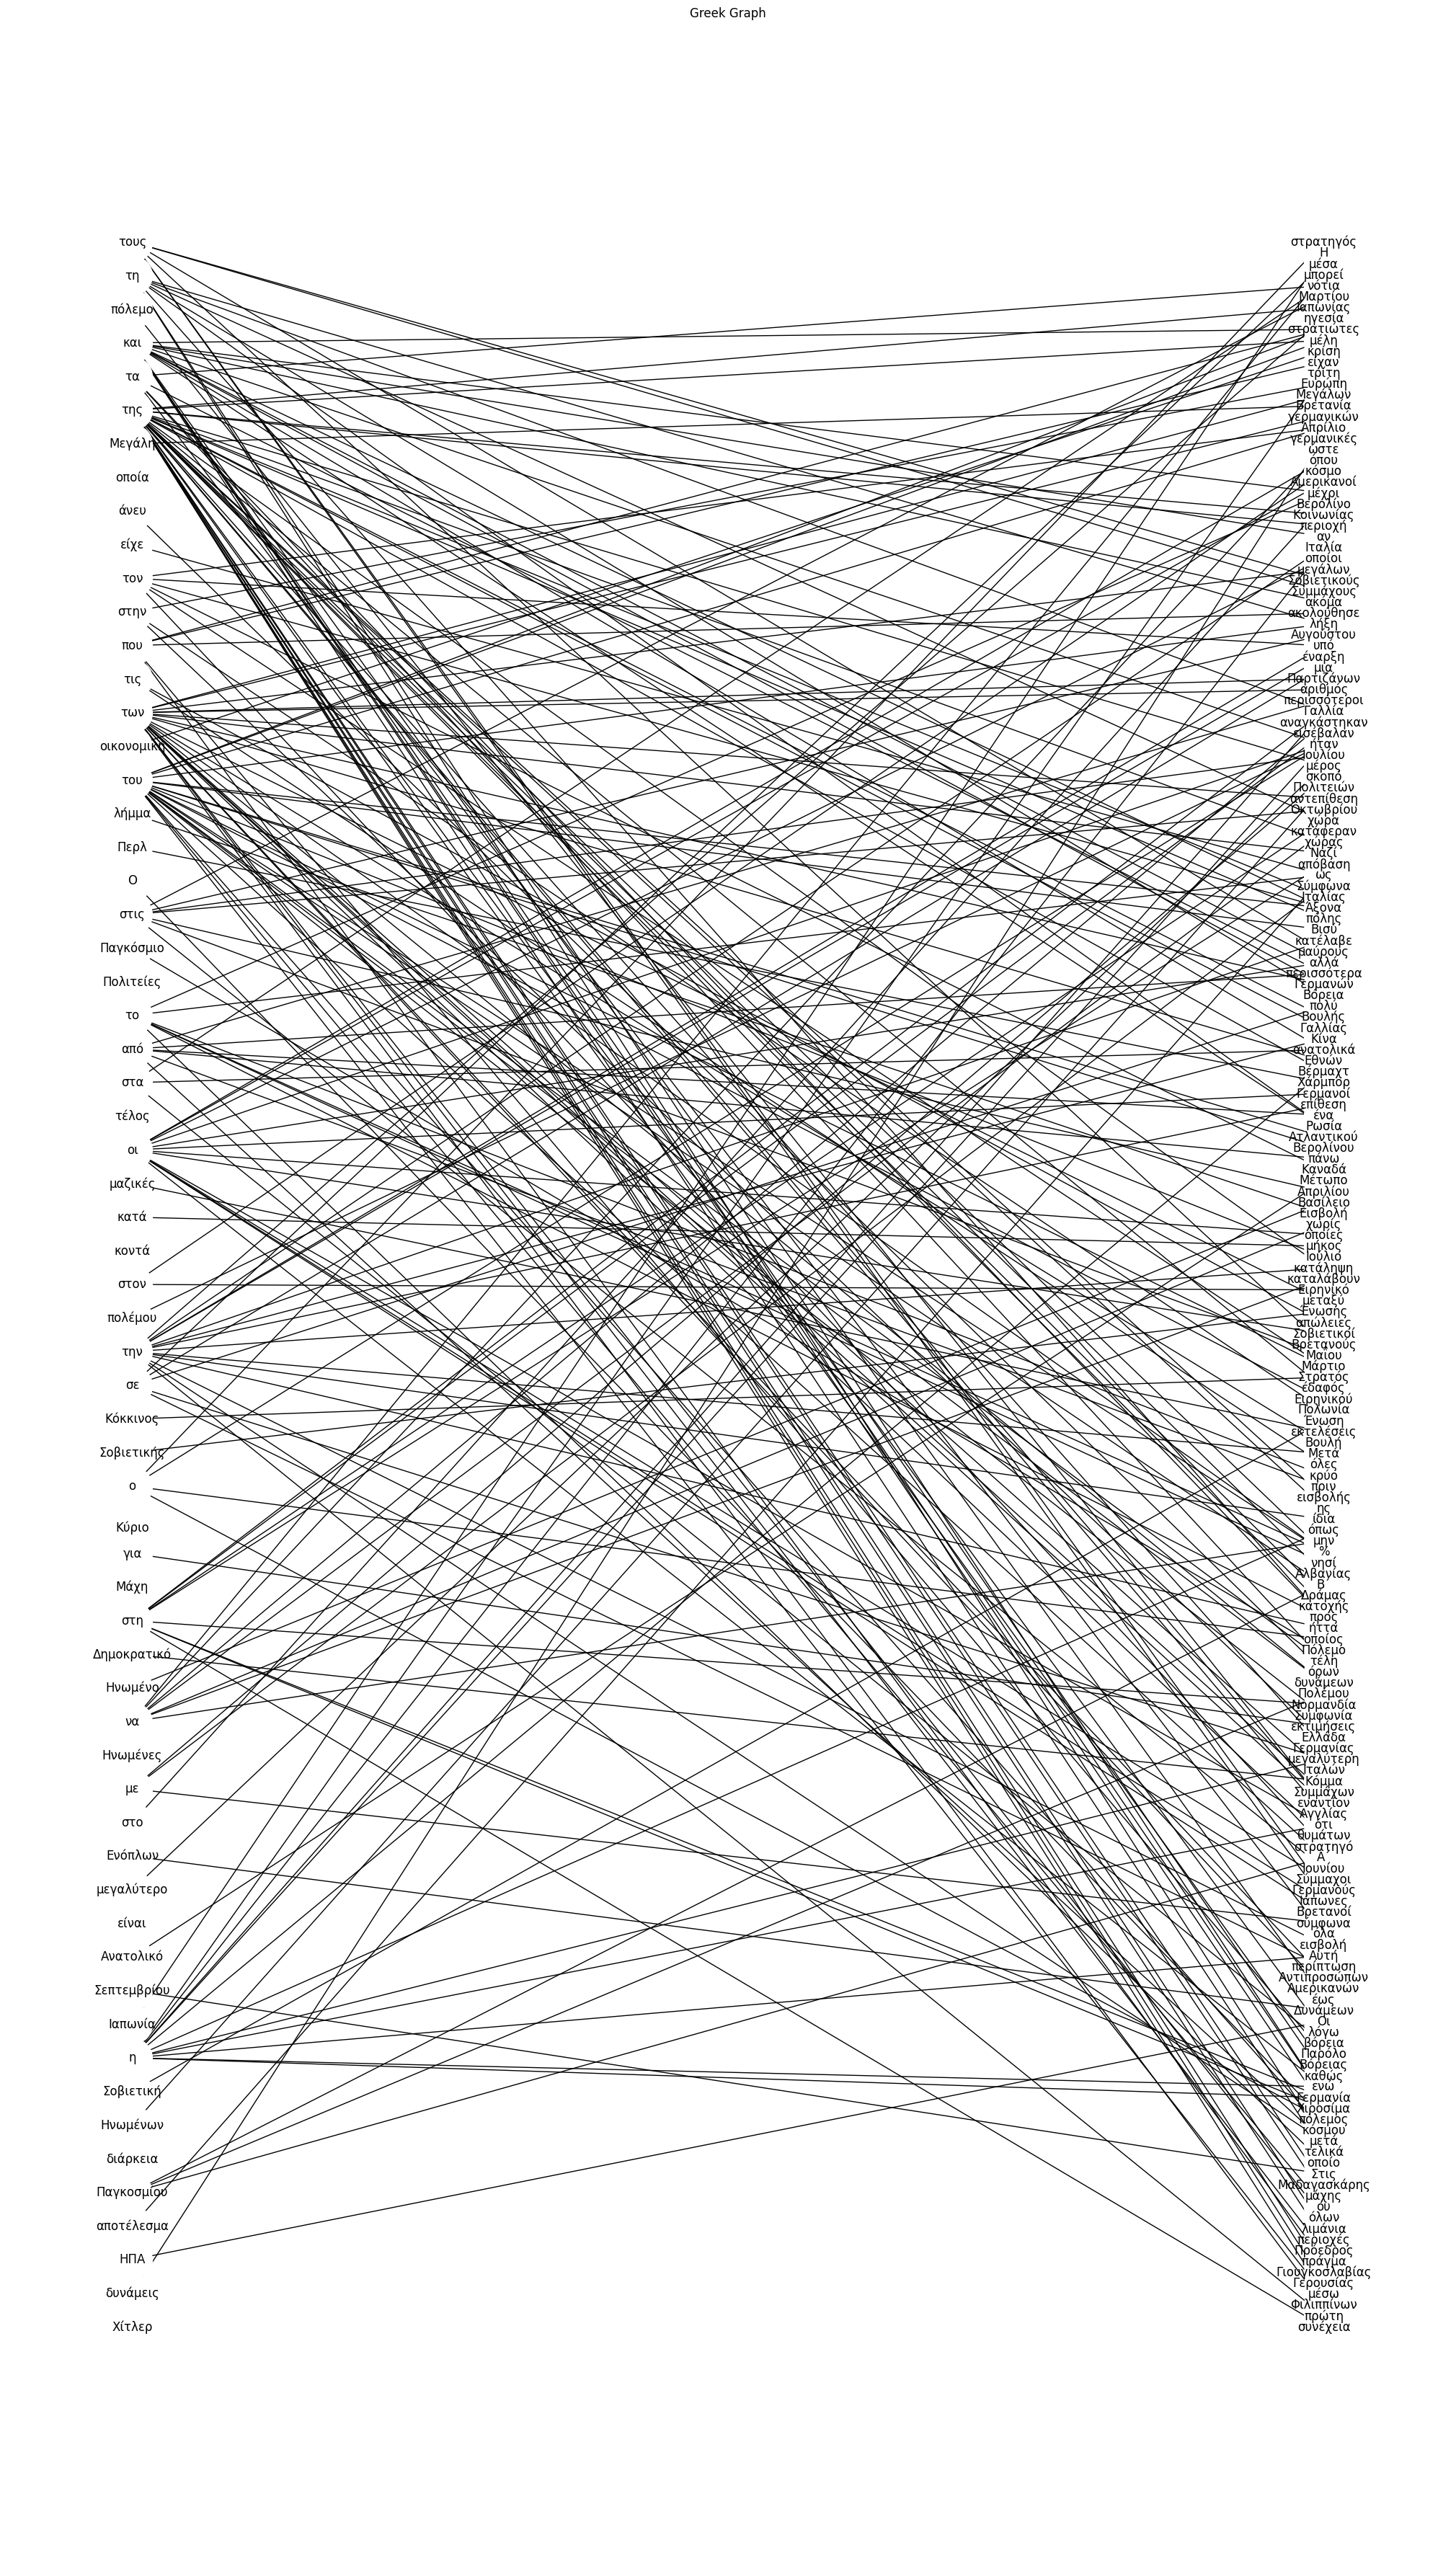

In [67]:
greek_graph.remove_edges_from(nx.selfloop_edges(greek_graph))

left_nodes = {edge[0] for edge in greek_graph.edges()}
right_nodes = set(greek_graph.nodes()) - left_nodes

pos = nx.bipartite_layout(greek_graph, nodes=left_nodes, align='vertical', scale=2)

plt.figure(figsize=(20, 35))
nx.draw(greek_graph, pos, with_labels=True, node_color='white', node_size=1500, edge_color='black')
plt.title("Greek Graph")
plt.show()

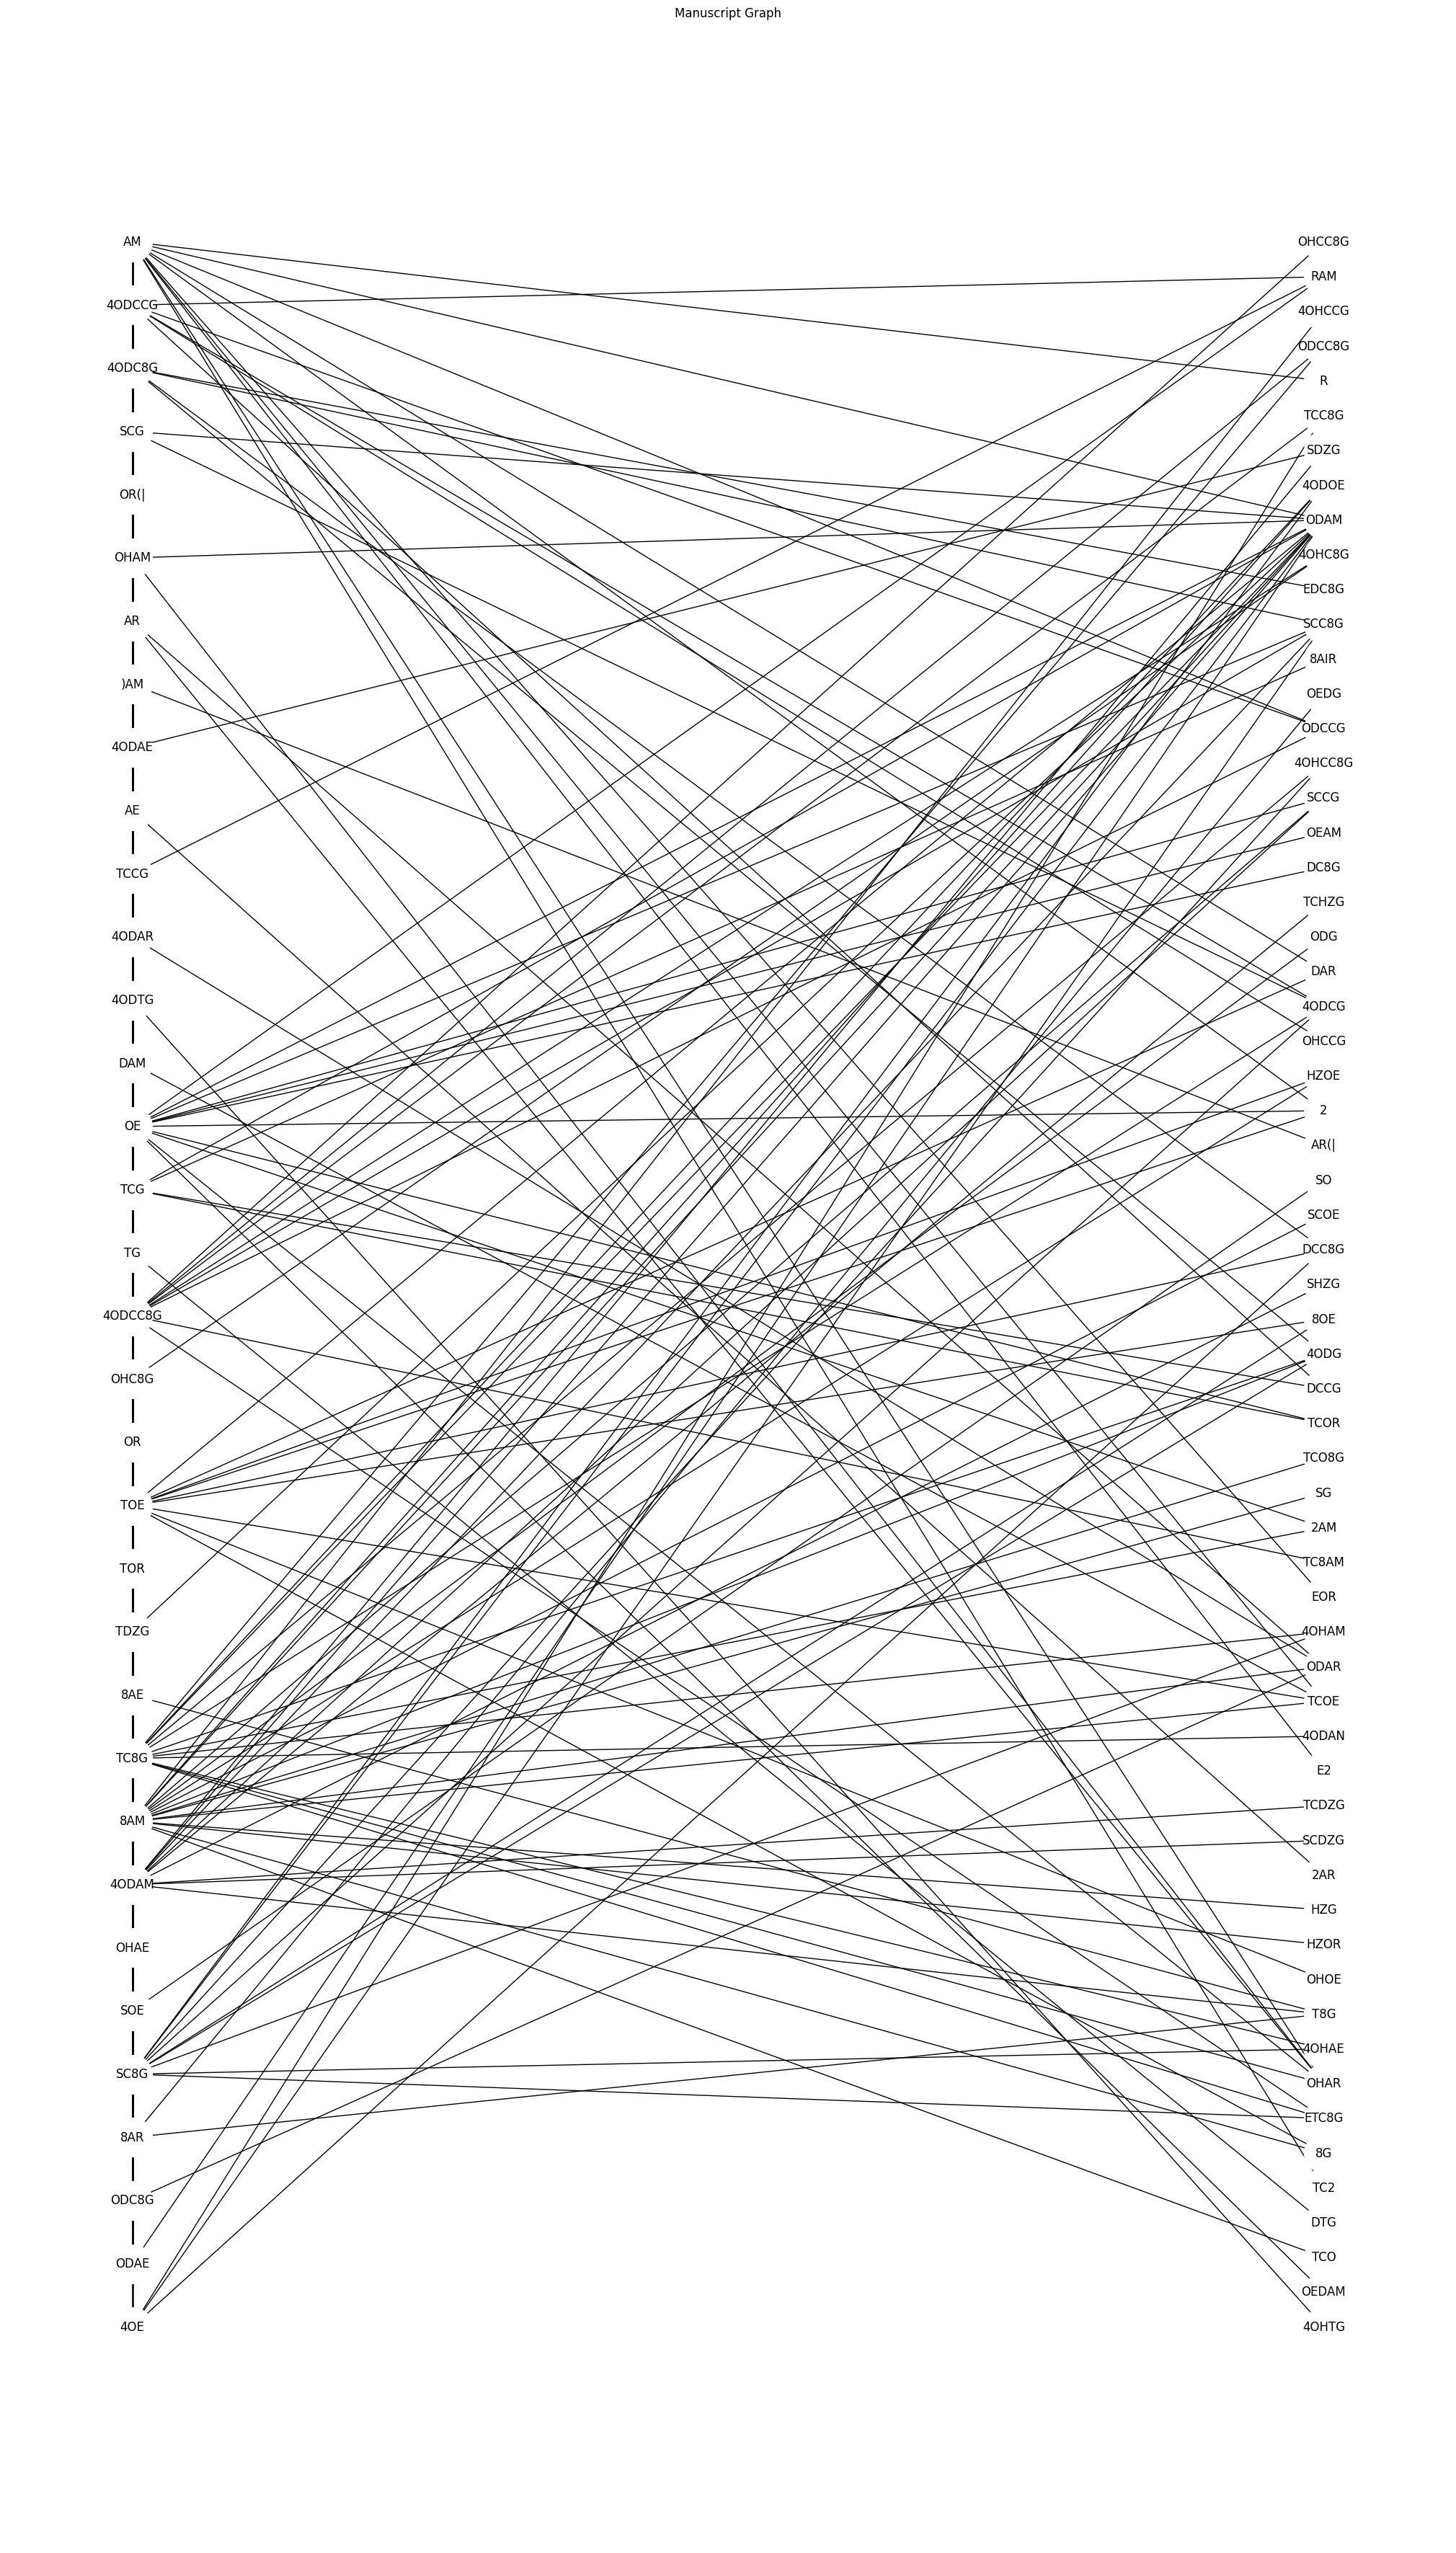

In [68]:
manuscript_graph.remove_edges_from(nx.selfloop_edges(manuscript_graph))

left_nodes = {edge[0] for edge in manuscript_graph.edges()}
right_nodes = set(manuscript_graph.nodes()) - left_nodes

pos = nx.bipartite_layout(manuscript_graph, nodes=left_nodes, align='vertical', scale=2)

plt.figure(figsize=(20, 35))
nx.draw(manuscript_graph, pos, with_labels=True, node_color='white', node_size=1500, edge_color='black')
plt.title("Manuscript Graph")
plt.show()

## Wnioski
Na bazie przeprowadzonych analiz, można stwierdzić, że Manuskrypt Wojnicza wykazuje niektóre cechy podobne do języka greckiego. Jednakże, nie można jednoznacznie określić natury tego tekstu, bowiem pewne metryki wydają się znacząco odbiegać względem wartości obliczonych dla greckich odpowiedników. Niestety, odnalezienie przyczyny tego zjawiska nie jest możliwe wykorzystując wyłącznie przedstawione wyżej metody. Analiza nie pozwala na stwierdzenie czy Manuskrypt Wojnicza jest zapisany tekstem w języku naturalnym. W tym celu konieczne jest przeprowadzenie kolejnych badań.